Chemically Driven Persistence Images
====================================

In the code below, we will demonstrate the functions that are necessary to take a chemical molecule from x,y, and z coordinates to persistance images. Note, that the VariancePersist function defined in Element_PI.py located within the PersistentImages_Chemistry repository does this same process. However, this will exhibit the exact steps that specific function takes.
 

Produce PI with Electronegativity
---------------------------------

First we load the necessary classes and functions.

In [220]:
from Element_PI import PersImage, Makexyzdistance, VariancePersist
from ripser import Rips
from ripser import ripser
rips = Rips()
from sklearn.base import TransformerMixin
import numpy as np
import collections
from itertools import product
import collections
import pandas as pd
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm
import scipy.spatial as spatial
import matplotlib.pyplot as plt
from elements import ELEMENTS


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Now we obtain the data files that contain the x,y, and z coordinates for the compounds we are concerned with. For our purposes, we will be using HBR and F<sub>2</sub>. 

In [221]:
compound_1 = 'babel/1.xyz'
#compound_2 = 'babel/2.xyz'

At this point, we can produce a PI by using the VariancePersist function as outlined in the PI tutorial. However, we will further outline the functions that the VariancePersist function utilizes. First we will set our hyperparameters descriped in the PI Tutorial. 

In [230]:
pixelx, pixely = 10,10
myspread = .08
myspecs={"maxBD": 2, "minBD":0}


Now we generate a matrix that stores the distances from each atoms as well as the element names

In [231]:
D_1, element_1 = Makexyzdistance(compound_1)
#D_2, element_2 = Makexyzdistance(compound_2)

Now we generate and visualize the Persistence Diagram(PD).

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


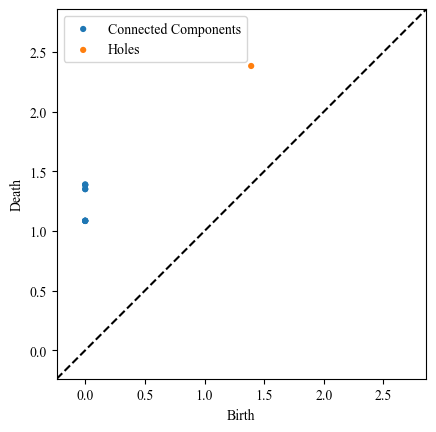

In [232]:
PD_1 = ripser(D_1,distance_matrix=True)

#graph the PD
rips = Rips()
rips.transform(D_1, distance_matrix=True)
rips.dgms_[0]=rips.dgms_[0][0:-1]
rips.plot(show=False, lifetime=False, labels=['Connected Components','Holes'])
L = plt.legend()
plt.setp(L.texts, family="Times New Roman")
plt.rcParams["font.family"] = "Times New Roman"

Now, we isolate the birth and death values for the connected component(h0) and holes(h1). This step is necessary to incorporate the electronegativity differences in the next step.

In [233]:
pointsh0_1 = (PD_1['dgms'][0][0:-1,1])
pointsh1_1 = (PD_1['dgms'][1])
diagram_1 = rips.fit_transform(D_1, distance_matrix=True)


When we consider representing a chemical molecule as a vectorized persistence image(PI), there is the possiblilty that two chemcial molecules can produce identical PIs. The molecules HBR and F<sub>2</sub> exhibit this quality. To remedy this issue, we compute the variance of the Gaussian kernel by incorporating the pairwise electronegativity differences of the atoms in the molecules.

Here, we find the pairwise electronegativity differences.

In [234]:
eleneg_1=list()
for index in pointsh0_1:
    c = np.where(np.abs((index-PD_1['dperm2all'])) < .00000015)[0]

    eleneg_1.append(np.abs(ELEMENTS[element_1[c[0]]].eleneg - ELEMENTS[element_1[c[1]]].eleneg))

h0matrix_1 = np.hstack(((diagram_1[0][0:-1,:], np.reshape((((np.array(eleneg_1)*1.05)+.01)/10 ), (np.size(eleneg_1),1)))))
buffer_1 = np.full((diagram_1[1][:,0].size,1), 0.05)
h1matrix_1 = np.hstack((diagram_1[1],buffer_1))


Finally we stack the matricies including the electronegativities together to form one matrix. We apply the transform function from the PersImage class to the matrix. This transform function takes the PD and converts it to a tiltled persistence diagram where we plot birth vs persistence (lifetime). We take the tilted PD and apply a Gaussian distribution on each point along with a linear weighting function. This resulting surface is converted to pixel values determined by the pixelx, pixely values. This results in the persistence image.



In [235]:
Totalmatrix_1 = np.vstack((h0matrix_1,h1matrix_1))
pim_1 = PersImage(pixels=[pixelx,pixely], spread=myspread, specs=myspecs, verbose=False)
imgs_1 = pim_1.transform(Totalmatrix_1)

Finally, we visualize the persistance image.

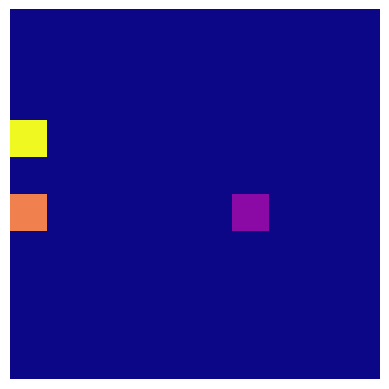

In [236]:
pim.show(imgs_1)
plt.show()